In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report,multilabel_confusion_matrix
from sklearn.metrics import f1_score,precision_score,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
iris_data = load_iris()

In [3]:
dir(iris_data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)

In [5]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## EDA

In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_df['output'] = iris_data.target

In [8]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),output
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 3.1 sepal length (cm)

<AxesSubplot: xlabel='sepal length (cm)', ylabel='Density'>

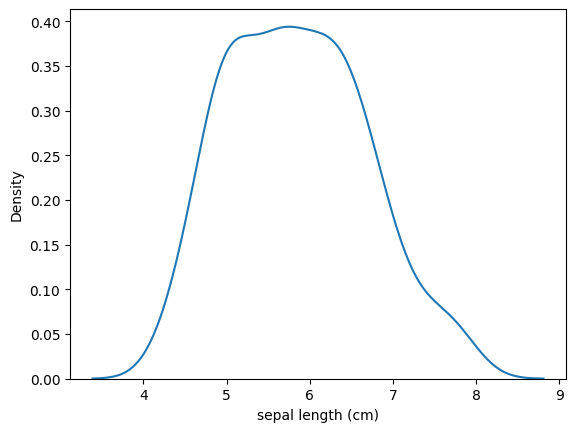

In [9]:
sns.kdeplot(iris_df['sepal length (cm)'])

In [10]:
iris_df['sepal length (cm)'].skew()

0.3149109566369728

<AxesSubplot: >

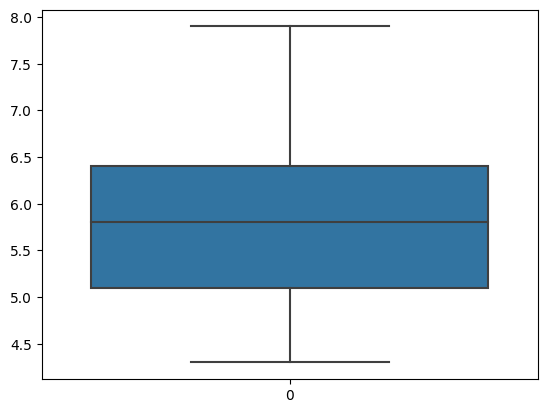

In [11]:
sns.boxplot(iris_df['sepal length (cm)'])

### sepal width (cm)

<AxesSubplot: xlabel='sepal width (cm)', ylabel='Density'>

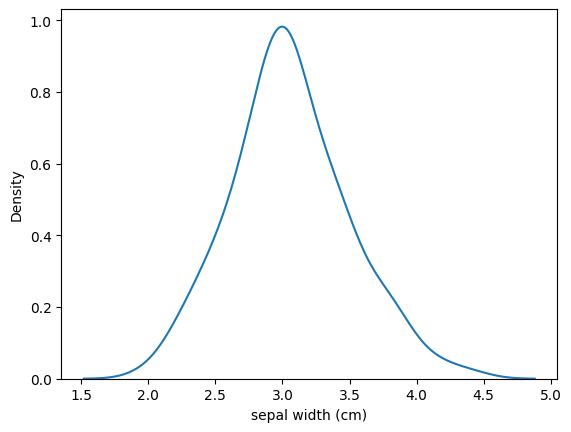

In [12]:
sns.kdeplot(iris_df['sepal width (cm)'])

In [13]:
iris_df['sepal width (cm)'].skew()

0.31896566471359966

<AxesSubplot: >

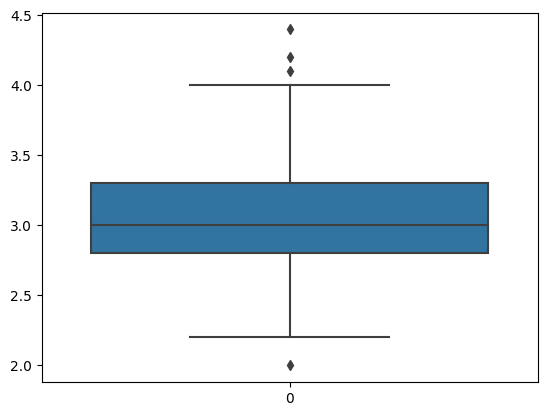

In [14]:
sns.boxplot(iris_df['sepal width (cm)'])

In [15]:
iris_df['sepal width (cm)'] = np.where(iris_df['sepal width (cm)'].between(2.1,4.0),iris_df['sepal width (cm)'],iris_df['sepal width (cm)'].mean())

In [16]:
iris_df['sepal width (cm)'].skew()

0.12981130631739055

<AxesSubplot: >

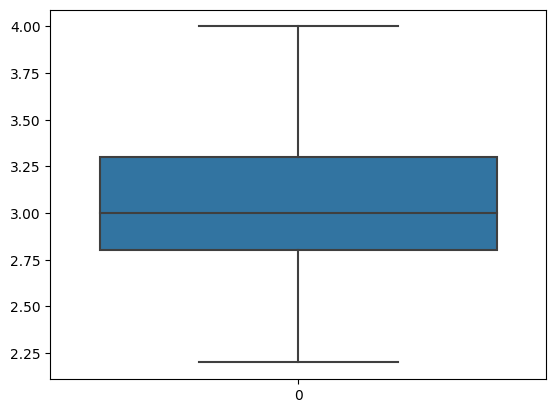

In [17]:
sns.boxplot(iris_df['sepal width (cm)'])

### petal length (cm)

<AxesSubplot: xlabel='petal length (cm)', ylabel='Density'>

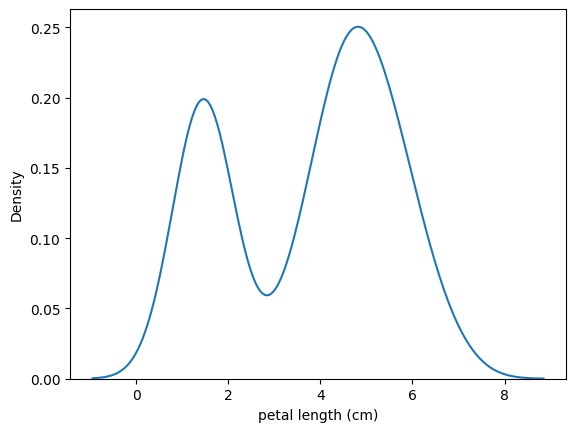

In [18]:
sns.kdeplot(iris_df['petal length (cm)'])

<AxesSubplot: >

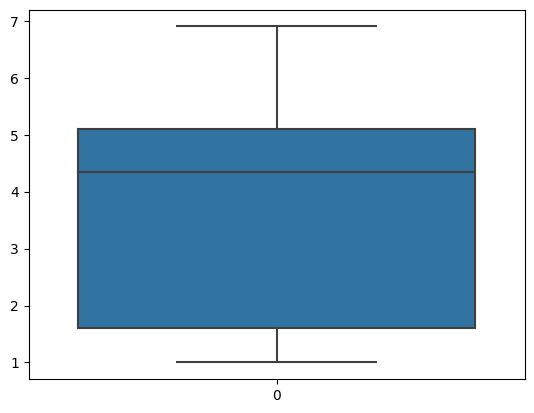

In [19]:
sns.boxplot(iris_df['petal length (cm)'])

In [20]:
iris_df['petal length (cm)'].skew()

-0.27488417975101276

### petal width (cm) 

<AxesSubplot: >

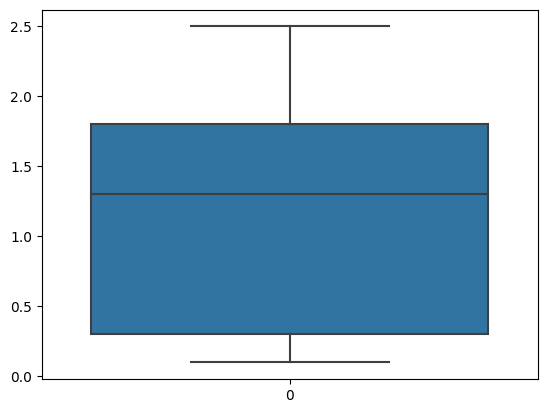

In [21]:
sns.boxplot(iris_df['petal width (cm)'])

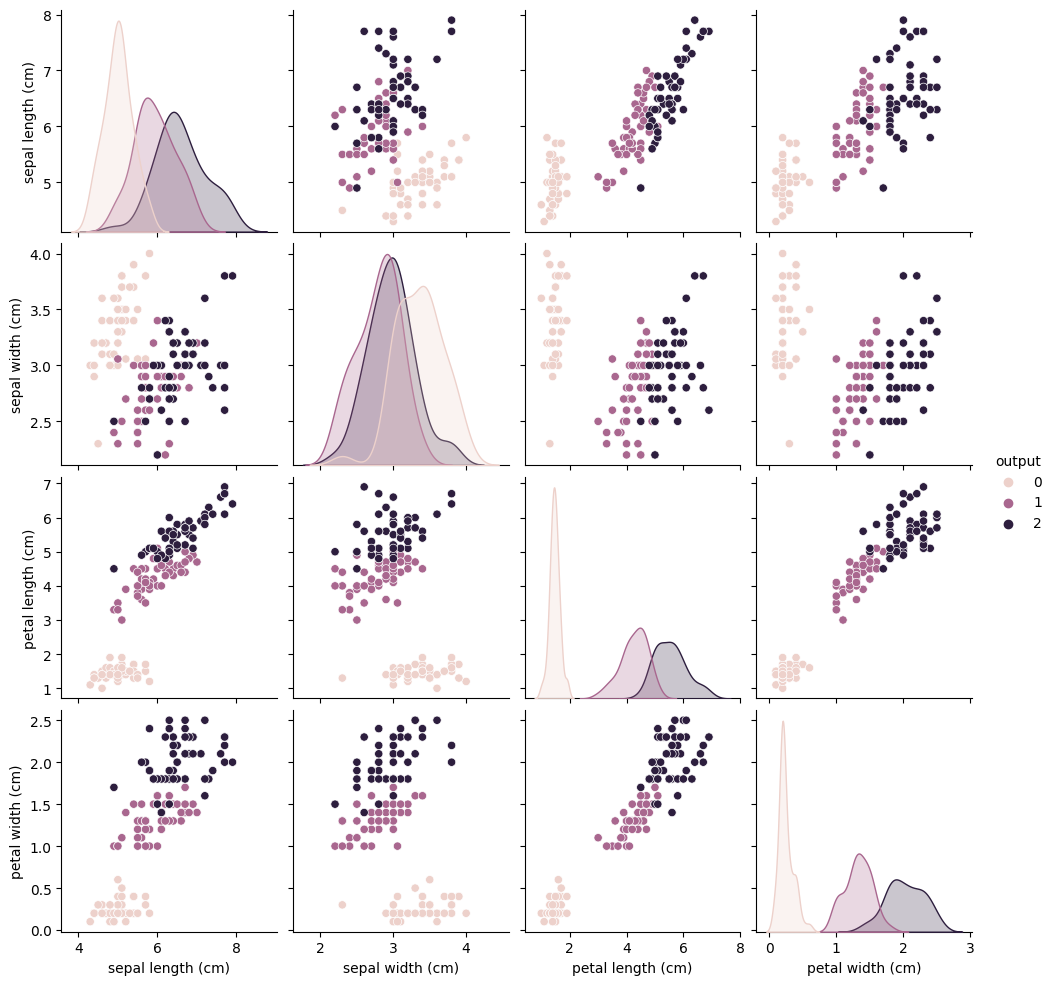

In [22]:
sns.pairplot(iris_df,hue='output')

In [23]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),output
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Feature Engineering

### Feature SElection

<AxesSubplot: >

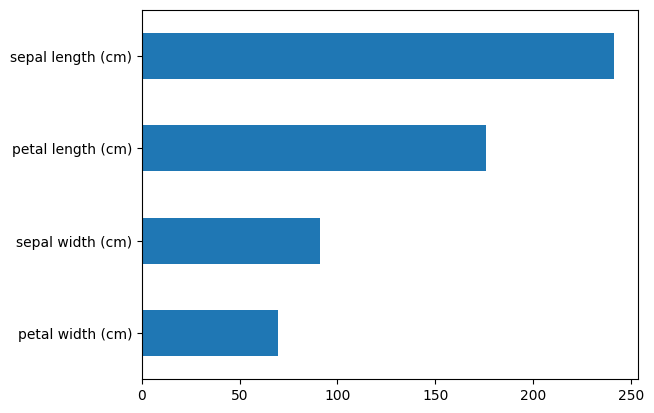

In [24]:
vif_list = []
x = iris_df.drop('output',axis=1)
for i in range(iris_df.shape[1]-1):
    vif = variance_inflation_factor(iris_df.values,i)
    vif_list.append(vif)
    
s1 = pd.Series(vif_list,index=x.columns)
s1.sort_values().plot(kind='barh')

In [25]:
iris_df.corr().tail(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),output
output,0.782561,-0.400176,0.949035,0.956547,1.0


In [26]:
x = iris_df.drop('output',axis=1)

In [27]:
y = iris_df['output']

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [29]:
log_clf = LogisticRegression()
log_clf

LogisticRegression()

In [30]:
log_clf.fit(x_train,y_train)

LogisticRegression()

In [40]:
def evaluate_model(model, ind_var, act):
    pred = model.predict(ind_var)
    
    acc_score = accuracy_score(act, pred)
    print('Accuracy Score :', acc_score)
    print('***'*20)
    
    cnf_matrix = confusion_matrix(act, pred)
    print('Confusion Matrix : \n', cnf_matrix)
    print('***'*20)
    
    mlabel_cnf_matrix = multilabel_confusion_matrix(act,pred)
    print('Multilabel Confusion Matrix : \n',mlabel_cnf_matrix)
    print('***'*20)
    
    clf_report = classification_report(act, pred)
    print('Classification Report : \n', clf_report)
    print('***'*20)
    
    return pred

print('Testing Data Evaluation'.center(60, '*'))
y_pred = evaluate_model(log_clf, x_test, y_test)

******************Testing Data Evaluation*******************
Accuracy Score : 1.0
************************************************************
Confusion Matrix : 
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
************************************************************
Multilabel Confusion Matrix : 
 [[[20  0]
  [ 0 10]]

 [[20  0]
  [ 0 10]]

 [[20  0]
  [ 0 10]]]
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

************************************************************


In [38]:
from pandas_profiling import ProfileReport 

In [39]:
ProfileReport(iris_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]